In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv("C:/Users/sansk/Desktop/github/spotify/combined-csv/test.csv")

In [55]:
df.head()

,endTime,artistName,trackName,msPlayed
0,########,dontaskalex,Heaven,97895
1,########,Offset,Ric Flair Drip (with Metro Boomin),983
2,########,DJ Khaled,POPSTAR (feat. Drake),644
3,########,Pop Smoke,Dior,2848
4,########,Drake,Chicago Freestyle (feat. Giveon),5020


In [56]:
df = df.rename(columns={'artistName':'artist', 'trackName':'track', 'msPlayed':'duration'})

In [57]:
df['duration'] = round((df['duration']/60000), 2)

In [58]:
df.head()

,endTime,artist,track,duration
0,########,dontaskalex,Heaven,1.63
1,########,Offset,Ric Flair Drip (with Metro Boomin),0.02
2,########,DJ Khaled,POPSTAR (feat. Drake),0.01
3,########,Pop Smoke,Dior,0.05
4,########,Drake,Chicago Freestyle (feat. Giveon),0.08


In [59]:
df2 = pd.DataFrame(df.groupby(['track']).sum())

In [60]:
df2.head()

,duration
track,
!I'll Be Back!,1.97
(I Can't Get No) Satisfaction - Mono Version,3.71
(i hope you) miss me,1.31
03:00,18.72
03:15,57.15


In [61]:
mergedRes = pd.merge(df, df2, on ='track')

In [62]:
mergedRes.head(100)

,endTime,artist,track,duration_x,duration_y
0,########,dontaskalex,Heaven,1.63,17.39
1,########,dontaskalex,Heaven,1.66,17.39
2,########,dontaskalex,Heaven,1.92,17.39
3,########,dontaskalex,Heaven,1.92,17.39
4,########,dontaskalex,Heaven,1.92,17.39
...,...,...,...,...,...
95,########,H.E.R.,Slide,2.77,93.95
96,########,H.E.R.,Slide,3.97,93.95
97,########,H.E.R.,Slide,3.97,93.95
98,########,H.E.R.,Slide,3.97,93.95


In [63]:
final_df = mergedRes.sort_values('duration_y', ascending=False)

In [64]:
final_df = final_df.drop_duplicates('track')
final_df = final_df.drop(['duration_x'], axis =1)

In [65]:
final_df = final_df.rename(columns = {'duration_y':'duration'})

In [66]:
final_df['track'].str.replace('\$','', regex=True).astype(str)

2191         Dreamcatcher (feat. Swae Lee & Travis Scott)
4302                                                20/20
2969                                     Calling My Phone
3263                                        ATL Freestyle
271                                  GREECE (feat. Drake)
                              ...                        
5808                                             Maintain
34                      Had Enough (feat. Quavo & Offset)
7323                                  Lose You To Love Me
1459                                              Darlin'
6519    Feels (feat. Pharrell Williams, Katy Perry & B...
Name: track, Length: 1740, dtype: object

In [67]:
final_df.shape

(1740, 4)

In [68]:
final_df.head(20)

,endTime,artist,track,duration
2191,########,Metro Boomin,Dreamcatcher (feat. Swae Lee & Travis Scott),309.42
4302,########,Lil Tjay,20/20,209.50
2969,########,Lil Tjay,Calling My Phone,188.78
3263,########,6LACK,ATL Freestyle,187.54
271,########,DJ Khaled,GREECE (feat. Drake),167.78
950,########,Gunna,Car Sick (feat. NAV & Metro Boomin),162.29
305,########,Ruel,too many feelings,146.42
2713,########,Drake,Laugh Now Cry Later (feat. Lil Durk),145.57
2516,########,Metro Boomin,Space Cadet (feat. Gunna),145.43
8018,########,Verzache,Some Things,133.71


(40.0, 0.0)

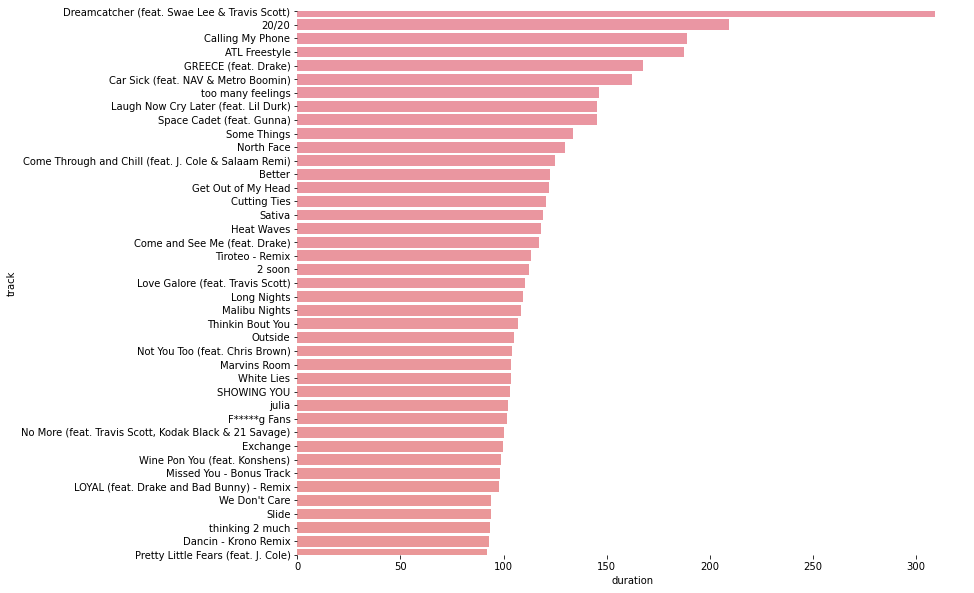

In [69]:
plt.figure(figsize=(12, 10))
sns.barplot(data=final_df, x='duration', y='track')
sns.despine(left=True, bottom=True)
plt.ylim(40, 0)